### pandas数据使用

##### series的创建

In [1]:
import pandas as pd
import numpy as np
from PIL.ImageChops import difference
from numpy.ma.extras import unique

from jupyter_Demo.np_def import score

#类似一个表格
# s=pd.Series([1,2,3,4,5],index=['a','b','c','d','e']) #index索引默认为0，1, 2...
#定义标签
s1=pd.Series([1,2,3,4,5],index=['a','b','c','d','e'],name='表格名字')
print(s1)
# print(s)

a    1
b    2
c    3
d    4
e    5
Name: 表格名字, dtype: int64


In [10]:
 # 通过字典创建
s=pd.Series({"a":1,"b":2,"c":3,"d":4,"e":5})
print(s)
print(s.index,s.values)        #索引，值
print(s.shape,s.ndim,s.size)  #形状，维度，长度
s.name="dict"
print(s.dtype,s.name)
print(f'显式索引{s.loc['a':'c']}')  #显示索引index
print(f'隐式索引{s.iloc[0:2]}')     #默认隐式索引就是0，1，2，3......
print(s.at['a'])                  #只能访问显式单个字符不能切片
print(s.iat[0])                   #只能访问隐式单个字符不能切片
#也可以直接访问显式索引
print(s['a'])
#显式函数和隐式函数区别就是加一个i

a    1
b    2
c    3
d    4
e    5
dtype: int64
Index(['a', 'b', 'c', 'd', 'e'], dtype='object') [1 2 3 4 5]
(5,) 1 5
int64 dict
a    1
b    2
c    3
Name: dict, dtype: int64
a    1
b    2
Name: dict, dtype: int64
1
1


In [11]:
#  访问数据
#访问头部或者尾部默认五个数字可以自定义。
print(s.head(6))
print(s.tail())

a    1
b    2
c    3
d    4
e    5
Name: dict, dtype: int64
a    1
b    2
c    3
d    4
e    5
Name: dict, dtype: int64


In [7]:
# 常见函数
# np.nan缺失值和None都会被pd识别为NaN
s=pd.Series([1,2,3,np.nan,5,None,7],index=['a','b','c','d','e','f','g'],name='data')
print(s)


a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
f    NaN
g    7.0
Name: data, dtype: float64


In [13]:
s.head()
# 获取所有的描述性信息（统计函数）
print(s.describe())   #count会过滤缺失值，基本的统计函数都一次性出现
#分位数
s.quantile(0.25)   #和numpy的不一样，numpy的是percentile
print(s.mode())  #众数，都出现一次的话会每个都打印

count    5.000000
mean     3.600000
std      2.408319
min      1.000000
25%      2.000000
50%      3.000000
75%      5.000000
max      7.000000
Name: data, dtype: float64
0    1.0
1    2.0
2    3.0
3    5.0
4    7.0
Name: data, dtype: float64


In [10]:
s.isna()  #检查缺失值numpy中的是isnan()

a    False
b    False
c    False
d     True
e    False
f     True
g    False
Name: data, dtype: bool

In [9]:
s.isin([1,2,8])  #isin检查是否在数组[1,2,8]中出现

a     True
b     True
c    False
d    False
e    False
f    False
g    False
Name: data, dtype: bool

In [17]:
#每个元素出现的次数
s.drop_duplicates()  #去重，返回表
s.unique()           #返回array
#去重的函数
print(s.value_counts())  #返回每个值出现的次数
print(s.nunique())   #去重返回元素个数

data
1.0    1
2.0    1
3.0    1
5.0    1
7.0    1
Name: count, dtype: int64
5


In [19]:
s.sort_index() #按索引排序
s.sort_values() #按值排序

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
f    NaN
g    7.0
Name: data, dtype: float64

In [16]:
# Series案例
import pandas as pd
#创建一个包含十名学生数学成绩的Series，成绩范围在50-100之间，计算平均分，最高分，最低分，找出高于平均分人数
import numpy as np

np.random.seed(42)
score=pd.Series(np.random.randint(50,101,10),
                index=['学生'+str(i) for i in range(1,11)])  #字符串拼接可以自动生成学生i
print(score)
print(score.mean())
print(score.max())
print(score.min())
mean=score.mean()
print(score[score>mean])
print(score[score>mean].count())  #bool索引会返回大于平均分的人
print(f"高于平均分的学生人数为%d人"%len(score[score>mean]))

学生1     88
学生2     78
学生3     64
学生4     92
学生5     57
学生6     70
学生7     88
学生8     68
学生9     72
学生10    60
dtype: int32
73.7
92
57
学生1    88
学生2    78
学生4    92
学生7    88
dtype: int32
4
高于平均分的学生人数为4人


In [29]:
# 给定某城市一周的最高温度Series，
# 找出温度超过30度的天数，计算平均温度，温度从高到低排序，
# 找出温度变化最大的两天
import pandas as pd
import numpy as np
temperatures=pd.Series([28,31,29,32,30,27,33],index=['周一','周二','周三','周四','周五','周六','周日'])
print(temperatures[temperatures>30].count())
print(temperatures.mean())
print(temperatures.sort_values(ascending=False)) #ascending是否升序
tf=temperatures.diff().abs() #diff()方法，自动分析前后的差值
print(*(tf.sort_values(ascending=False).index[:2:])) #星号去掉中括号

3
30.0
周日    33
周四    32
周二    31
周五    30
周三    29
周一    28
周六    27
dtype: int64
周日 周二


In [34]:
# 给定股票10个交易日的收盘价，计算每日收益率（当日收盘价/前日收盘价-1）
# 找出收益率最高的和最低的日期
# 计算波动率（收益率的标准差）

#生成日期序列
print(pd.date_range('20130101', periods=4)) #第一个参数是格式，第二个是天数

prices=pd.Series([102.3,103.5,105.1,104.8,106.2,107.0,106.5,108.1,109.3,110.2],index=pd.date_range('2023-01-01',periods=10))
a=prices.pct_change()
print(a) #收益率函数pct_change()，(当日/前日的数值)-1
print(a.idxmax())  #收益的索引函数idxmax()
print(a.idxmin())
print(a.std())

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04'], dtype='datetime64[ns]', freq='D')
2023-01-01         NaN
2023-01-02    0.011730
2023-01-03    0.015459
2023-01-04   -0.002854
2023-01-05    0.013359
2023-01-06    0.007533
2023-01-07   -0.004673
2023-01-08    0.015023
2023-01-09    0.011101
2023-01-10    0.008234
Freq: D, dtype: float64
2023-01-03 00:00:00
2023-01-07 00:00:00
0.007373623845361105


In [51]:
#某产品过去12个月的销售量Series
# 计算季度平均销量
sales=pd.Series([120,135,145,160,155,170,180,175,190,200,210,220],index=pd.date_range('2022-01-01',periods=12,freq='MS')) #freq是间距MS每月开始，ME每月结束，D每天，H每小时，W每周
print(sales.resample('QS').mean())  #重新采样，按照季度QS，YS年度开始，MS月开始,D天
print(sales.idxmax(),'\n')
a=sales.pct_change()
print(a)
# 找出销量最高的月份，计算月环比增长率。找出连续增长超过2个月的月份
b=a>0
b[b.rolling(3).sum()==3].keys().tolist()

2022-01-01    133.333333
2022-04-01    161.666667
2022-07-01    181.666667
2022-10-01    210.000000
Freq: QS-JAN, dtype: float64
2022-12-01 00:00:00 

2022-01-01         NaN
2022-02-01    0.125000
2022-03-01    0.074074
2022-04-01    0.103448
2022-05-01   -0.031250
2022-06-01    0.096774
2022-07-01    0.058824
2022-08-01   -0.027778
2022-09-01    0.085714
2022-10-01    0.052632
2022-11-01    0.050000
2022-12-01    0.047619
Freq: MS, dtype: float64


[Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00')]

In [12]:
#某店销售小时销售额
#按天重采样计算每日总销售额
#计算每天营业时间（8点到22点）和非营业时间的销售比例
#找出销售高的三个小时

import numpy as np
import pandas as pd
np.random.seed(42)
hours_sale=pd.Series(np.random.randint(0,100,24),index=pd.date_range('2025-01-01',periods=24,freq='h'))
# print(hours_sale)
day_sale=hours_sale.resample('D').sum()
print(f'按天重采样的每日总销售额为{day_sale}')
bet_time=hours_sale.between_time('8:00','22:00').sum() #时间段的value
#布尔索引的时间段销售额
hours_sale[(hours_sale.index.hour>=8) & (hours_sale.index.hour<=22)].sum()
#计算每天营业时间（8点到22点）和非营业时间的销售比例
print(bet_time/(day_sale-bet_time))
#找出销售高的三个小时
print(hours_sale.nlargest(3).keys())  #最大的三个数下标nlargest(3).key()

按天重采样的每日总销售额为2025-01-01    1205
Freq: D, dtype: int32
2025-01-01    1.429435
Freq: D, dtype: float64


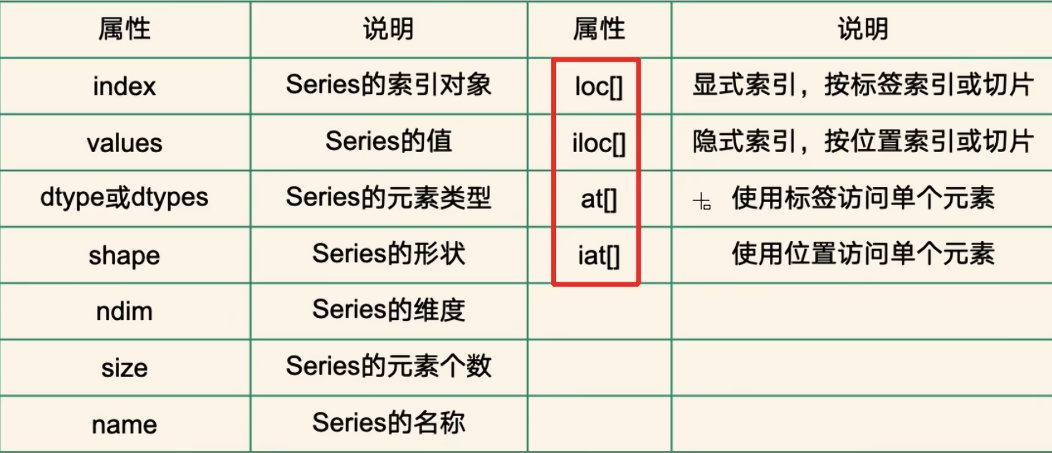
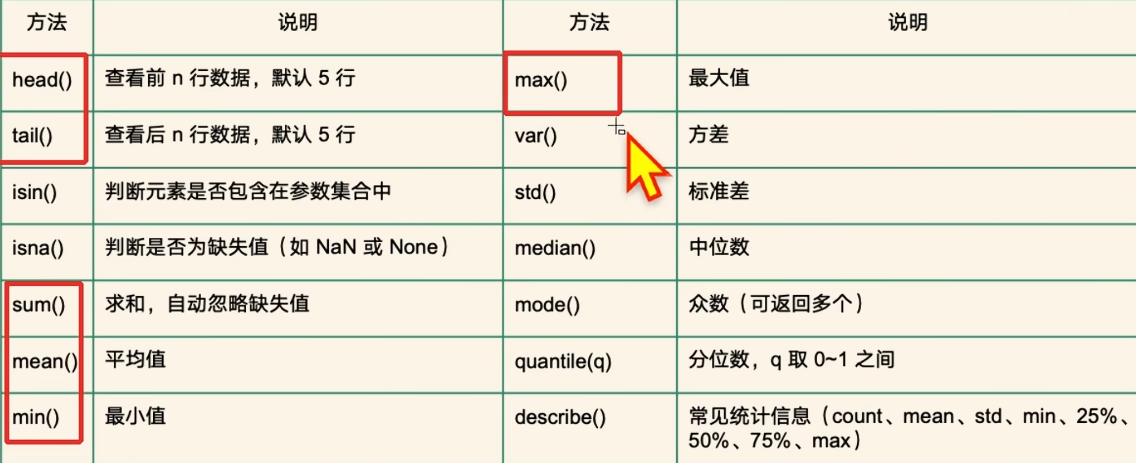
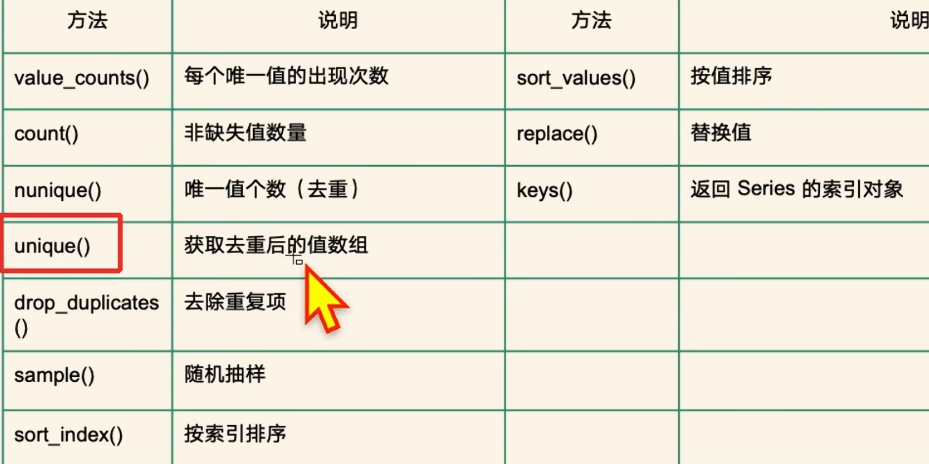